In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
unmasked_001 = pd.read_csv('002_trace_int.txt', delimiter = " ", header = None)
z = []
for i in range(len(unmasked_001)):
    z += [unmasked_001.iloc[[i]].mean(axis=1).tolist() + unmasked_001.iloc[[i]].std(axis=1).tolist()]

In [3]:
z= np.array(z)

In [4]:
from scipy.stats import multivariate_normal
from sklearn.metrics import f1_score

def estimateGaussian(dataset):
    mu = np.mean(dataset, axis=0)
    sigma = np.cov(dataset.T)
    return mu, sigma
    
def multivariateGaussian(dataset,mu,sigma):
    p = multivariate_normal(mean=mu, cov=sigma)
    return p.pdf(dataset)

def selectThresholdByCV(probs,gt):
    best_epsilon = 0
    best_f1 = 0
    f = 0
    stepsize = (max(probs) - min(probs)) / 1000;
    epsilons = np.arange(min(probs),max(probs),stepsize)
    for epsilon in np.nditer(epsilons):
        predictions = (probs < epsilon) 
        f = f1_score(gt, predictions,average='binary')
        if f > best_f1:
            best_f1 = f
            best_epsilon = epsilon
    
    return best_f1, best_epsilon

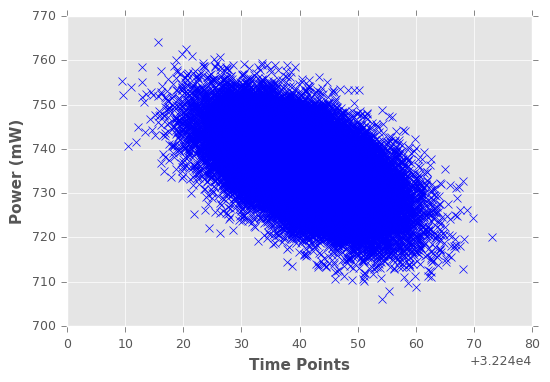

In [16]:
plt.style.use('ggplot')

plt.rcParams['font.family'] = 'serif'
plt.rcParams['font.serif'] = 'Ubuntu'
plt.rcParams['font.monospace'] = 'Ubuntu Mono'
plt.rcParams['font.size'] = 12
plt.rcParams['axes.labelsize'] = 11
plt.rcParams['axes.labelweight'] = 'bold'
plt.rcParams['axes.titlesize'] = 12
plt.rcParams['xtick.labelsize'] = 9
plt.rcParams['ytick.labelsize'] = 9
plt.rcParams['legend.fontsize'] = 11
plt.rcParams['figure.titlesize'] = 13

plt.xlabel('Time Points')
plt.ylabel('Power (mW)')
plt.plot(z[:,0],z[:,1],'bx')
plt.show()

In [8]:
mu, sigma = estimateGaussian(z)
p = multivariateGaussian(z,mu,sigma)

In [10]:
unmasked_001 = pd.read_csv('001_trace_int.txt', delimiter = " ", header = None)
cv = []
for i in range(len(unmasked_001)):
    cv += [unmasked_001.iloc[[i]].mean(axis=1).tolist() + unmasked_001.iloc[[i]].std(axis=1).tolist()]
cv = np.array(cv)

In [11]:
gt_data = [0]*50000
for i in range(50000):
    if (z[i][0] < 31000 or z[i][0] > 32300) and (z[i][1] <= 720 or z[i][1] >= 740):
        gt_data[i] = 1

In [12]:
p_cv = multivariateGaussian(cv,mu,sigma)
fscore, ep = selectThresholdByCV(p_cv,gt_data)
print(fscore, ep)

C:\Users\Majid\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)


0.00833333333333 7.384707881154761e-06


In [13]:
outliers = np.asarray(np.where(p < ep))

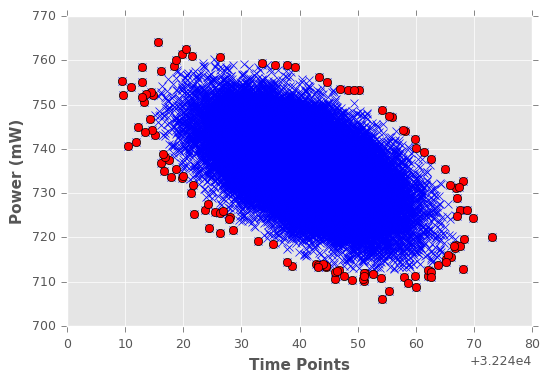

In [15]:
plt.figure()
plt.xlabel('Time Points')
plt.ylabel('Power (mW)')
plt.plot(z[:,0],z[:,1],'bx')
plt.plot(z[outliers,0],z[outliers,1],'ro')
plt.show()